<a href="https://colab.research.google.com/github/SAIPRANEETH7/MachineLearning-1/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-11-ef933ec57f0b>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


Mean Absolute Error (XGBoost): 15817.79249546715
Mean Squared Error (XGBoost): 638384462.4966835
R2 Score (XGBoost): 0.9203765954381511
Cross-validation scores: [0.9023787  0.88557307 0.88837675]
Mean CV score: 0.8921095073240689


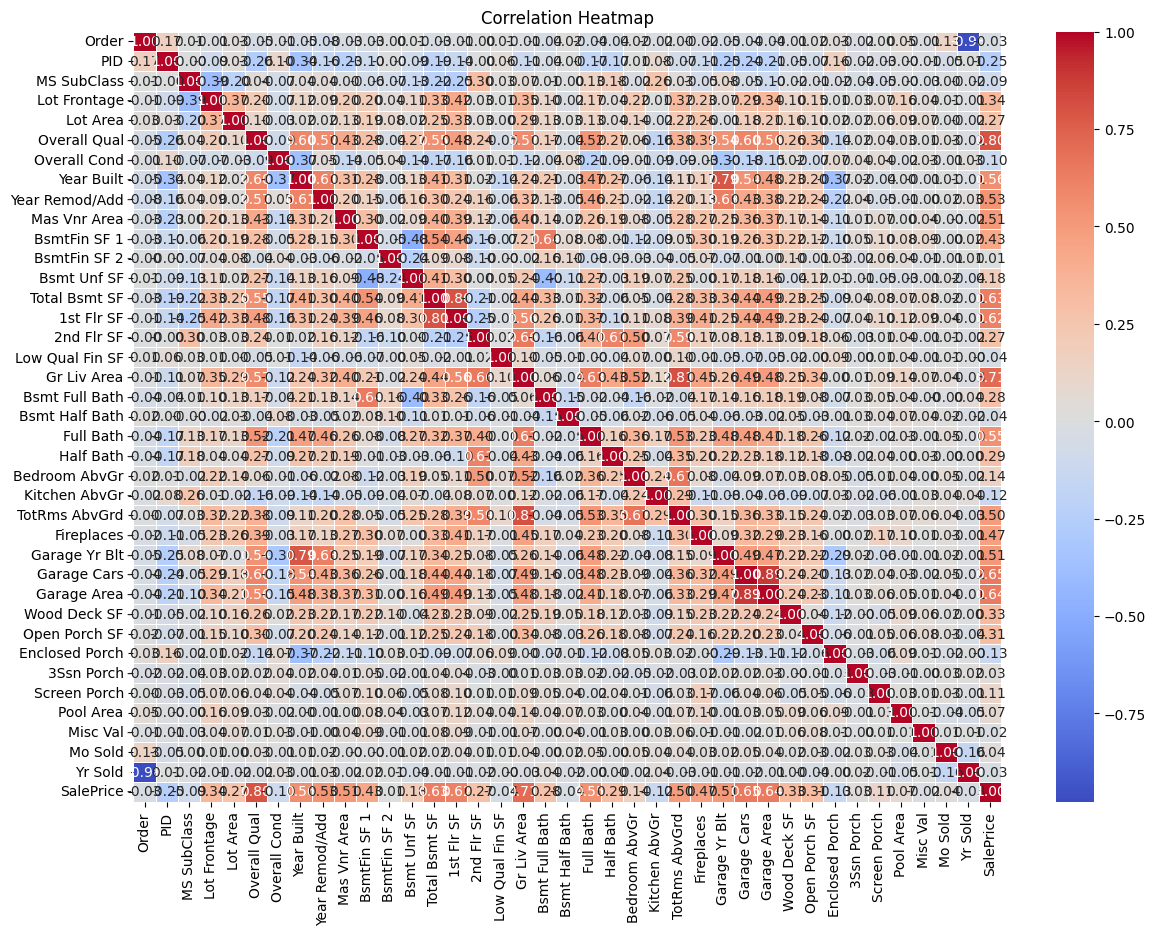

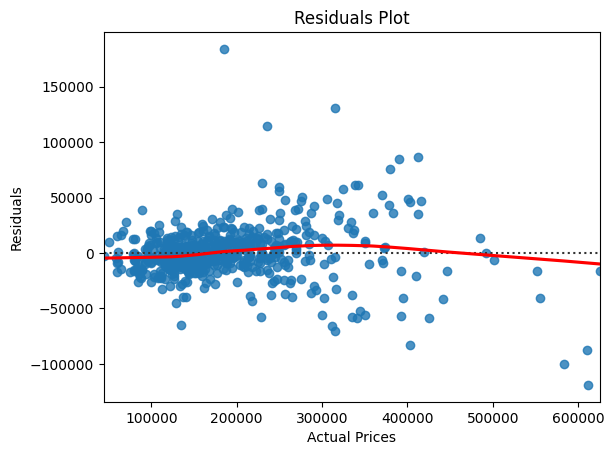

Best XGBoost R2 Score: 0.9291490572675529


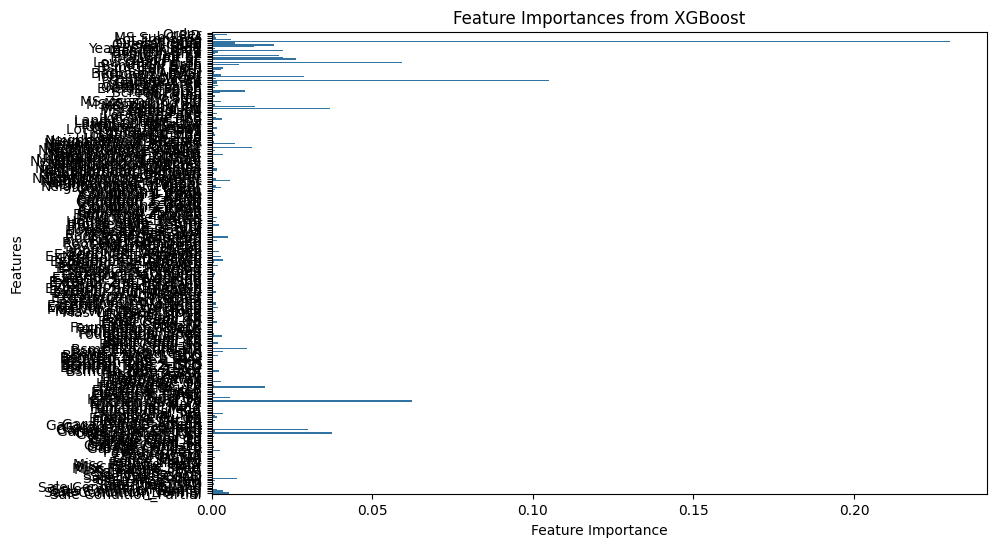

Mean Absolute Error (Linear Regression): 16668.48826347423
Mean Squared Error (Linear Regression): 1300522802.026165
R2 Score (Linear Regression): 0.837790454982797
XGBoost vs Linear Regression:
XGBoost R2: 0.9203765954381511
Linear Regression R2: 0.837790454982797


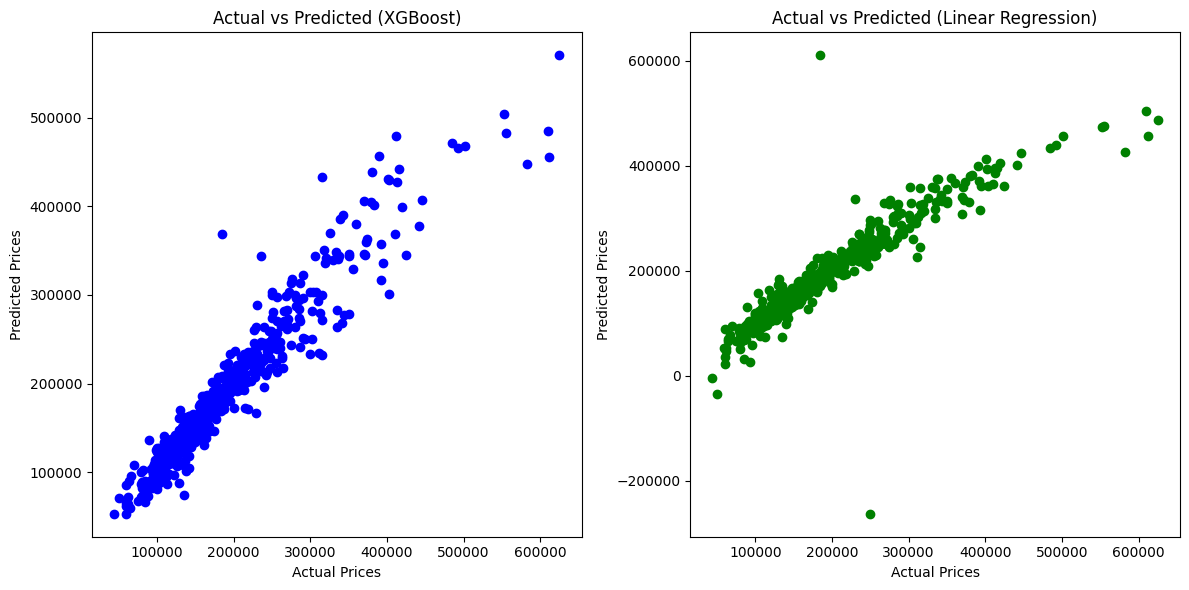

In [11]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# Load dataset
data = pd.read_csv('/content/AmesHousing.csv')

# Drop redundant or less useful features (if applicable)
# For example, drop 'Id' if it exists
if 'Id' in data.columns:
    data.drop(['Id'], axis=1, inplace=True)

# Handle missing values
# For numeric columns, fill missing values with the mean
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# For categorical columns, fill missing values with the mode (most frequent value)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Encode categorical variables (if any) using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Separate features (X) and target variable (y)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
print("Mean Absolute Error (XGBoost):", mean_absolute_error(y_test, y_pred_xgb))
print("Mean Squared Error (XGBoost):", mean_squared_error(y_test, y_pred_xgb))
print("R2 Score (XGBoost):", r2_score(y_test, y_pred_xgb))

# Cross-validation score with R2 score
cv_scores = cross_val_score(xgb, X_train, y_train, cv=3, scoring='r2')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean()}")

# Visualize correlations (for numeric features only)
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Residuals Plot
sns.residplot(x=y_test, y=y_pred_xgb, lowess=True, line_kws={'color': 'red'})
plt.title("Residuals Plot")
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.show()

# Hyperparameter tuning using GridSearchCV (optional)
params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}
grid_search = GridSearchCV(estimator=xgb, param_grid=params, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred_xgb_best = best_model.predict(X_test)
print("Best XGBoost R2 Score:", r2_score(y_test, y_pred_xgb_best))

# Plot feature importances (optional)
plt.figure(figsize=(10, 6))
sns.barplot(x=best_model.feature_importances_, y=X.columns)
plt.title("Feature Importances from XGBoost")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

# Model comparison (optional, comparing with other models like Linear Regression)
from sklearn.linear_model import LinearRegression

# Train and predict using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate Linear Regression
print("Mean Absolute Error (Linear Regression):", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error (Linear Regression):", mean_squared_error(y_test, y_pred_lr))
print("R2 Score (Linear Regression):", r2_score(y_test, y_pred_lr))

# Model Comparison
print("XGBoost vs Linear Regression:")
print(f"XGBoost R2: {r2_score(y_test, y_pred_xgb)}")
print(f"Linear Regression R2: {r2_score(y_test, y_pred_lr)}")

# Plot actual vs predicted values for both models
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_xgb, color='blue')
plt.title("Actual vs Predicted (XGBoost)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_lr, color='green')
plt.title("Actual vs Predicted (Linear Regression)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.tight_layout()
plt.show()
